In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt

<h3> Loading the Dataset </h3>

In [72]:
data = pd.read_csv("/content/drive/MyDrive/coin_Bitcoin.csv",parse_dates=True,squeeze=True)

<h3> EDA </H3>

In [73]:
data.head() 

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [74]:
data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11
2990,2991,Bitcoin,BTC,2021-07-06 23:59:59,35038.536363,33599.916169,33723.509655,34235.193451,2.650126e+10,6.418992e+11


In [75]:
data=data.drop(['SNo','Name','Symbol','High','Low','Open','Volume','Marketcap'],axis=1)

In [76]:
data.head()

,Date,Close
0,2013-04-29 23:59:59,144.539993
1,2013-04-30 23:59:59,139.000000
2,2013-05-01 23:59:59,116.989998
3,2013-05-02 23:59:59,105.209999
4,2013-05-03 23:59:59,97.750000


In [77]:
data.describe(include="all")

,Date,Close
count,2991,2991.000000
unique,2991,NaN
top,2014-09-25 23:59:59,NaN
freq,1,NaN
mean,NaN,6711.290443
std,NaN,11298.141921
min,NaN,68.431000
25%,NaN,430.569489
50%,NaN,2286.409912
75%,NaN,8576.238715


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2991 non-null   object 
 1   Close   2991 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.9+ KB


<h3> Checking for Null Values </H3>

In [79]:
data.isnull().sum()

Date     0
Close    0
dtype: int64

<h3> Checking for Duplicate Value </h3>

In [80]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


<h3> Data preprocessing </h3>

In [81]:
data['Date']=pd.to_datetime(data['Date'])

In [82]:
data.set_index('Date',inplace=True)

In [83]:
data.head(10)

,Close
Date,
2013-04-29 23:59:59,144.539993
2013-04-30 23:59:59,139.000000
2013-05-01 23:59:59,116.989998
2013-05-02 23:59:59,105.209999
2013-05-03 23:59:59,97.750000
2013-05-04 23:59:59,112.500000
2013-05-05 23:59:59,115.910004
2013-05-06 23:59:59,112.300003
2013-05-07 23:59:59,111.500000


# Get all the observations for all months for the year 2013.

In [84]:
data['2013']

,Close
Date,
2013-04-29 23:59:59,144.539993
2013-04-30 23:59:59,139.000000
2013-05-01 23:59:59,116.989998
2013-05-02 23:59:59,105.209999
2013-05-03 23:59:59,97.750000
...,...
2013-12-27 23:59:59,735.070007
2013-12-28 23:59:59,727.830017
2013-12-29 23:59:59,745.049988


<h3> Crypto Price for Bitcoin vs Time Frame </h3>

## Plot the Time Series to understand the behaviour of the data.

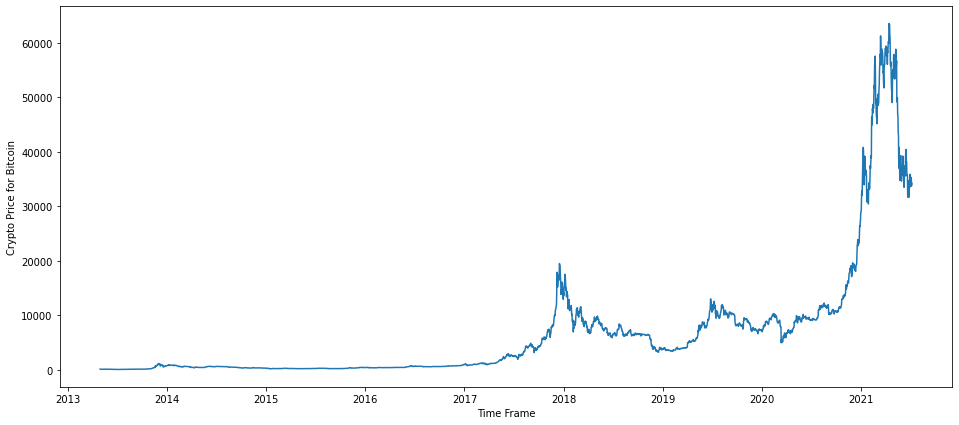

In [85]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Crypto Price for Bitcoin')
ax1.plot(data)

## Plot the average Close per year and the year on year percentage change of Close.

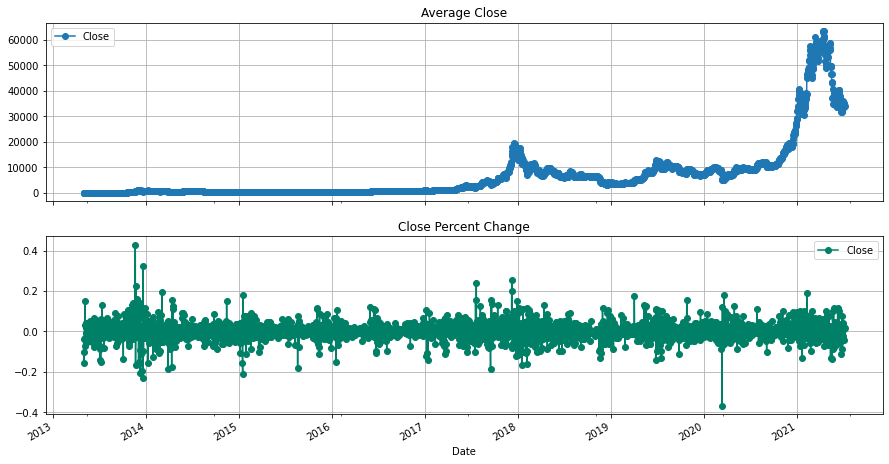

In [86]:
average    = data.groupby(data.index)["Close"].mean()
pct_change = data.groupby(data.index)["Close"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))


ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Close",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Close Percent Change",grid=True)

# Plot a monthplot of the give Time Series.

Decompose the Time Series

In [87]:
 import pandas.util.testing as tm

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

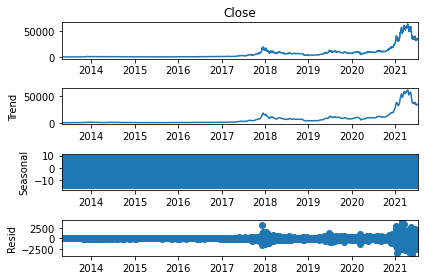

In [89]:
decomposition = seasonal_decompose(data['Close'],model='additive')
decomposition.plot();

## Check for stationarity of the whole Time Series data.

In [90]:
import pandas.util.testing as tm

In [91]:
from statsmodels.tsa.stattools import adfuller

In [92]:
test_result=adfuller(data['Close'])

In [93]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Close):
    result=adfuller(Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [94]:
adfuller_test(data['Close'])

ADF Test Statistic : -0.7973098451195627
p-value : 0.8199110033239145
#Lags Used : 29
Number of Observations Used : 2961
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<h3> Differencing </h3>

In [95]:
data['Close First Difference'] = data['Close'] - data['Close'].shift(1)

In [96]:
data['Close'].shift(1)

Date
2013-04-29 23:59:59             NaN
2013-04-30 23:59:59      144.539993
2013-05-01 23:59:59      139.000000
2013-05-02 23:59:59      116.989998
2013-05-03 23:59:59      105.209999
                           ...     
2021-07-02 23:59:59    33572.117653
2021-07-03 23:59:59    33897.048590
2021-07-04 23:59:59    34668.548402
2021-07-05 23:59:59    35287.779766
2021-07-06 23:59:59    33746.002456
Name: Close, Length: 2991, dtype: float64

In [97]:
data['Seasonal First Difference']=data['Close'] - data['Close'].shift(12)

In [98]:
data.head(14)

,Close,Close First Difference,Seasonal First Difference
Date,,,
2013-04-29 23:59:59,144.539993,NaN,NaN
2013-04-30 23:59:59,139.000000,-5.539993,NaN
2013-05-01 23:59:59,116.989998,-22.010002,NaN
2013-05-02 23:59:59,105.209999,-11.779999,NaN
2013-05-03 23:59:59,97.750000,-7.459999,NaN
2013-05-04 23:59:59,112.500000,14.750000,NaN
2013-05-05 23:59:59,115.910004,3.410004,NaN
2013-05-06 23:59:59,112.300003,-3.610001,NaN
2013-05-07 23:59:59,111.500000,-0.800003,NaN


In [99]:
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.309960520099772
p-value : 3.2528838344258735e-08
#Lags Used : 29
Number of Observations Used : 2949
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


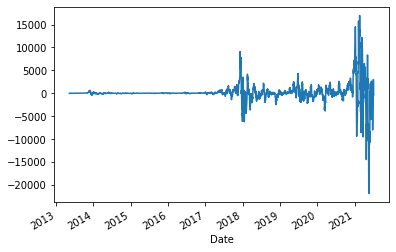

In [100]:
data['Seasonal First Difference'].plot()

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the Seasonal First Difference Close Data.

In [101]:
pip install --upgrade --no-deps statsmodels

In [102]:
import statsmodels.api as sm

In [103]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


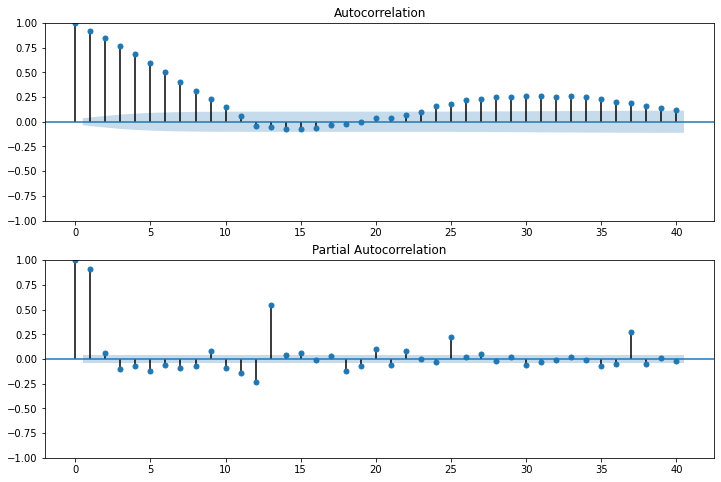

In [104]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

<h3> ARIMA Model Building </h3>

In [105]:
import statsmodels.tsa.arima.model as stats
from statsmodels.tsa.arima_model import ARIMA

In [106]:
model=stats.ARIMA(data['Close'],order=(2,1,2), trend="t")
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


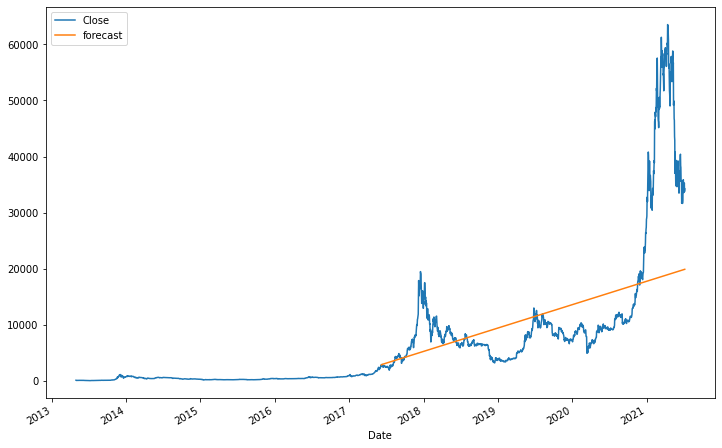

In [111]:
data['forecast']=model_fit.predict(start=1500,end=2991,dynamic=True)
data[['Close','forecast']].plot(figsize=(12,8))

<h3> SARIMA Model Budilding </h3>

In [108]:
import statsmodels.api as sm 

In [109]:
model=sm.tsa.statespace.SARIMAX(data['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


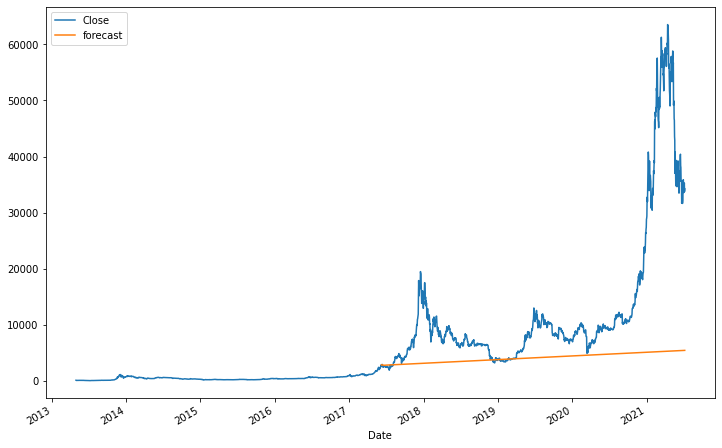

In [110]:
data['forecast']=results.predict(start=1500,end=2991,dynamic=True)
data[['Close','forecast']].plot(figsize=(12,8))

In [112]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [113]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [114]:
future_datest_df.head()


,Close,Close First Difference,Seasonal First Difference,forecast
2021-08-06 23:59:59,NaN,NaN,NaN,NaN
2021-09-06 23:59:59,NaN,NaN,NaN,NaN
2021-10-06 23:59:59,NaN,NaN,NaN,NaN
2021-11-06 23:59:59,NaN,NaN,NaN,NaN
2021-12-06 23:59:59,NaN,NaN,NaN,NaN


In [115]:
future_datest_df.tail()

,Close,Close First Difference,Seasonal First Difference,forecast
2023-02-06 23:59:59,NaN,NaN,NaN,NaN
2023-03-06 23:59:59,NaN,NaN,NaN,NaN
2023-04-06 23:59:59,NaN,NaN,NaN,NaN
2023-05-06 23:59:59,NaN,NaN,NaN,NaN
2023-06-06 23:59:59,NaN,NaN,NaN,NaN


In [116]:
future_df=pd.concat([data,future_datest_df])

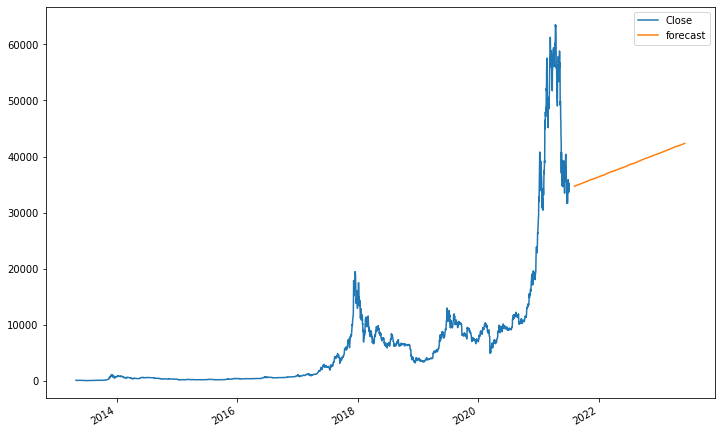

In [117]:
future_df['forecast'] = results.predict(start = 2991, end =5000, dynamic= True)  
future_df[['Close', 'forecast']].plot(figsize=(12, 8))

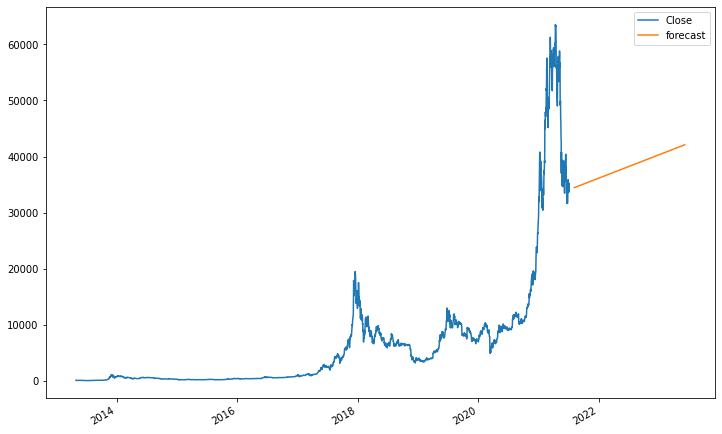

In [120]:
future_df['forecast'] = model_fit.predict(start = 2991, end =5000, dynamic= True)  
future_df[['Close', 'forecast']].plot(figsize=(12, 8))